In [118]:
import pandas as pd
from sklearn.metrics import accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [119]:
df = pd.read_csv('/content/daily_weather (1).csv')

In [120]:
df.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,high_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,1
1,917.347688,71.403843,101.935179,2.443009,140.471549,3.533324,0.0,0.0,24.328697,0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,1


In [121]:
df.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'high_humidity_3pm'],
      dtype='object')

In [122]:
df.shape

(1095, 10)

In [123]:
df.duplicated().any()

True

In [124]:
df.drop_duplicates(inplace=True)

In [125]:
df.dropna(inplace=True)

In [126]:
df.shape

(1063, 10)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063 entries, 0 to 1094
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   air_pressure_9am        1063 non-null   float64
 1   air_temp_9am            1063 non-null   float64
 2   avg_wind_direction_9am  1063 non-null   float64
 3   avg_wind_speed_9am      1063 non-null   float64
 4   max_wind_direction_9am  1063 non-null   float64
 5   max_wind_speed_9am      1063 non-null   float64
 6   rain_accumulation_9am   1063 non-null   float64
 7   rain_duration_9am       1063 non-null   float64
 8   relative_humidity_9am   1063 non-null   float64
 9   high_humidity_3pm       1063 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 91.4 KB


In [128]:
df.describe()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,high_humidity_3pm
count,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000
mean,918.900596,65.024635,142.387289,5.480874,148.547386,6.993399,0.182195,266.644303,34.089639,0.497648
std,3.179418,11.173095,69.132082,4.533720,67.150973,5.589624,1.535205,1503.777481,25.365480,0.500230
min,907.990000,36.752000,15.500000,0.693451,28.900000,1.185578,0.000000,0.000000,6.090000,0.000000
25%,916.590752,57.398000,66.109634,2.242780,76.323568,3.064608,0.000000,0.000000,15.092243,0.000000
50%,918.940000,65.822000,166.000000,3.869906,176.500000,4.943637,0.000000,0.000000,23.160000,0.000000
75%,921.164515,73.559248,191.100000,7.236501,201.150000,8.701697,0.000000,0.000000,44.700000,1.000000
max,929.320000,98.906000,343.400000,23.554978,312.200000,29.840780,24.020000,17704.000000,92.620000,1.000000


In [129]:
df.isnull().sum()

air_pressure_9am          0
air_temp_9am              0
avg_wind_direction_9am    0
avg_wind_speed_9am        0
max_wind_direction_9am    0
max_wind_speed_9am        0
rain_accumulation_9am     0
rain_duration_9am         0
relative_humidity_9am     0
high_humidity_3pm         0
dtype: int64

In [130]:
df['high_humidity_3pm'].value_counts()

0    534
1    529
Name: high_humidity_3pm, dtype: int64

In [131]:
df.shape

(1063, 10)

In [132]:
dependent_variable = 'high_humidity_3pm'

In [133]:
independent_variables = ['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am']

In [134]:
x = df[independent_variables]

In [135]:
y=df[dependent_variable]

In [136]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=324)

In [137]:
humidity_classifier=DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=10,random_state=0)
humidity_classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)

In [146]:
y_predicted = humidity_classifier.predict(x_test)

In [147]:
y_predicted[:10]

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1])

In [148]:
y_test[:10]

456     0
846     1
694     0
259     1
724     0
224     1
300     1
442     0
586     0
1074    1
Name: high_humidity_3pm, dtype: int64

In [149]:
accuracy_score(y_test, y_predicted) * 100

89.17378917378917

In [150]:
df.iloc[-1]

air_pressure_9am          921.530000
air_temp_9am               77.702000
avg_wind_direction_9am     97.100000
avg_wind_speed_9am          3.265932
max_wind_direction_9am    125.900000
max_wind_speed_9am          4.451511
rain_accumulation_9am       0.000000
rain_duration_9am           0.000000
relative_humidity_9am      14.560000
high_humidity_3pm           0.000000
Name: 1094, dtype: float64

In [151]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

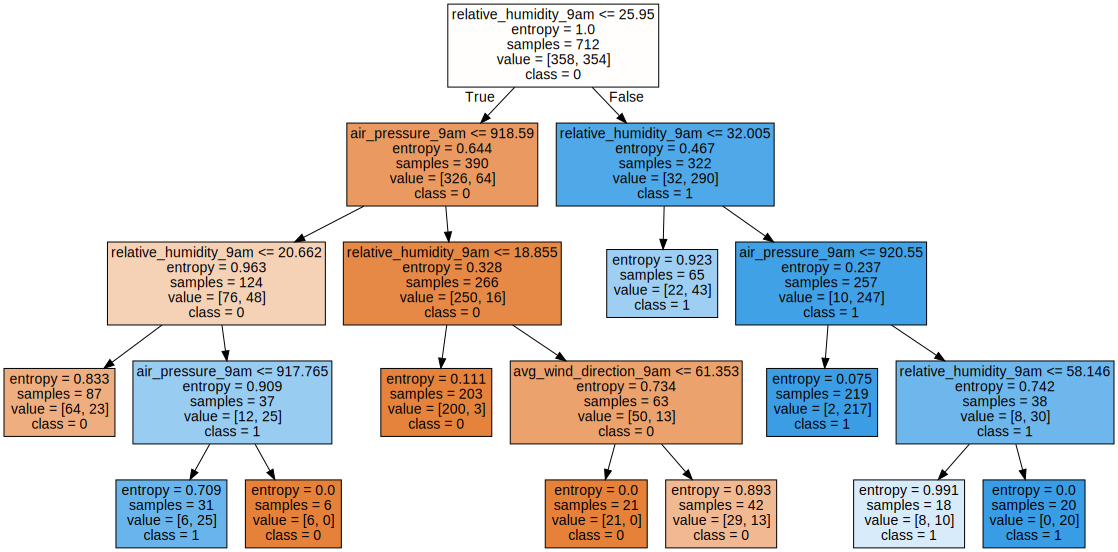

In [152]:
graph = Source(tree.export_graphviz(humidity_classifier, out_file=None
   , feature_names=x_train.columns, class_names=['0', '1']
   , filled = True))
display(SVG(graph.pipe(format='svg')))